# Лабораторна робота №5
## Студента групи МІТ-31 (підгрупа 2)
## Маніла Дмитра Олексійовича

# Завдання
1.  Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2.  Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

In [2]:
model_1 = pd.read_csv("./owner.csv")

In [4]:
insurance = model_1
insurance.head()

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1
3,3,2893,1,1,0,0,1
4,4,4010,1,0,0,1,1


In [5]:
insurance.isna().sum()

Unnamed: 0    0
salary        0
age           0
degree        0
gender        0
credits       0
is_gamer      0
dtype: int64

In [6]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0
2,2,420,0,1,0,1,1


In [9]:
X=insurance.drop("salary",axis=1)
y=insurance["salary"]

X.head(), y.head()

(   Unnamed: 0  age  degree  gender  credits  is_gamer
 0           0    0       0       1        1         0
 1           1    1       0       0        0         0
 2           2    0       1       0        1         1
 3           3    1       1       0        0         1
 4           4    1       0       0        1         1,
 0    3996
 1    1016
 2     420
 3    2893
 4    4010
 Name: salary, dtype: int64)

In [10]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(266, 6)

In [11]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 9859374.0000 - mse: 9859374.0000
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 9807554.0000 - mse: 9807554.0000
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 9756637.0000 - mse: 9756637.0000
Epoch 4/10
9/9 [==============================] - 0s 2ms/step - loss: 9706861.0000 - mse: 9706861.0000
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 9656273.0000 - mse: 9656273.0000
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 9607243.0000 - mse: 9607243.0000
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 9560666.0000 - mse: 9560666.0000
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 9512055.0000 - mse: 9512055.0000
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 9463945.0000 - mse: 9463945.0000
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 94

In [12]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 3517376.2500 - mse: 3517376.2500


In [18]:
ins_model.save("i_mod.h5")

ins_model_loaded=tf.keras.models.load_model("i_mod.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,Unnamed: 0,age,degree,gender,credits,is_gamer
58,58,1,1,1,0,1
259,259,0,1,1,0,1
95,95,0,0,0,0,0
131,131,1,0,1,1,0
286,286,1,1,1,1,0


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = model_1
insurance2.head(2)

,Unnamed: 0,salary,age,degree,gender,credits,is_gamer
0,0,3996,0,0,1,1,0
1,1,1016,1,0,0,0,0


In [41]:
ct = make_column_transformer(
    (MinMaxScaler(),["age", "degree","gender"]), 
    (OneHotEncoder(handle_unknown="ignore"),['credits','is_gamer'])
)
X=insurance2.drop("salary", axis=1)
y = insurance2["salary"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [42]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

3/3 [==============================] - 0s 2ms/step - loss: 2395.6282 - mae: 2395.6282


(266, 6)

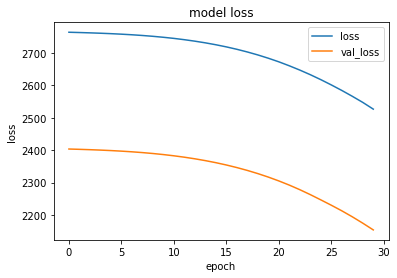

In [43]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [44]:
import matplotlib as plt
import sklearn.model_selection
import sklearn.datasets
import seaborn as sns

In [45]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [46]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [47]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [48]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [49]:
train_labels[7]

2

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [52]:
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4505 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3023 - val_accuracy: 0.1002
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3030 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3048 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy:

In [53]:
train_data.min(), train_data.max()

# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [54]:
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1823 - accuracy: 0.5504 - val_loss: 0.8595 - val_accuracy: 0.6693
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7931 - accuracy: 0.7024 - val_loss: 0.7641 - val_accuracy: 0.7205
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7238 - accuracy: 0.7343 - val_loss: 0.7203 - val_accuracy: 0.7392
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6802 - accuracy: 0.7539 - val_loss: 0.7084 - val_accuracy: 0.7408
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6560 - accuracy: 0.7633 - val_loss: 0.6703 - val_accuracy: 0.7600
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6382 - accuracy: 0.7696 - val_loss: 0.6498 - val_accuracy: 0.7689
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6252 - accuracy: 0.7723 - val_loss: 0.6416 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

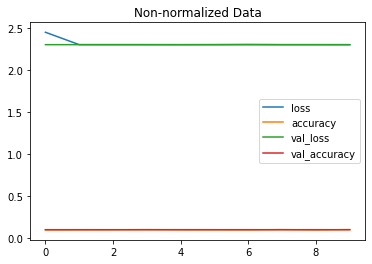

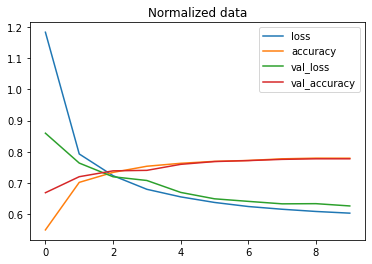

In [55]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [56]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1971 - accuracy: 0.5830 - val_loss: 0.8772 - val_accuracy: 0.6822
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7446 - accuracy: 0.7198 - val_loss: 0.7128 - val_accuracy: 0.7273
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.7560 - val_loss: 0.6602 - val_accuracy: 0.7661
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6151 - accuracy: 0.7773 - val_loss: 0.6458 - val_accuracy: 0.7754
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5988 - accuracy: 0.7820 - val_loss: 0.6244 - val_accuracy: 0.7710
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5879 - accuracy: 0.7843 - val_loss: 0.6265 - val_accuracy: 0.7757
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5818 - accuracy: 0.7850 - val_loss: 0.6144 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

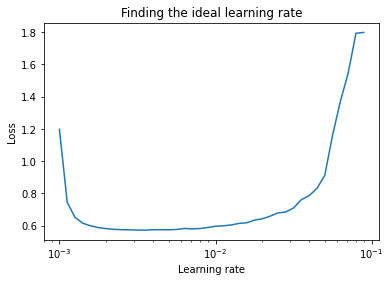

In [58]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [60]:
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2020 - accuracy: 0.5362 - val_loss: 0.7479 - val_accuracy: 0.7302
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6855 - accuracy: 0.7466 - val_loss: 0.6660 - val_accuracy: 0.7583
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6286 - accuracy: 0.7744 - val_loss: 0.6289 - val_accuracy: 0.7749
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5952 - accuracy: 0.7864 - val_loss: 0.6105 - val_accuracy: 0.7798
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5696 - accuracy: 0.7995 - val_loss: 0.6034 - val_accuracy: 0.7897
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5550 - accuracy: 0.8043 - val_loss: 0.5796 - val_accuracy: 0.7976
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5439 - accuracy: 0.8089 - val_loss: 0.5754 - val_accuracy:

In [61]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [62]:
y_probs = model_14.predict(test_data)

y_probs[:5]

array([[6.25031021e-07, 1.82524764e-06, 3.07414666e-06, 1.54529234e-09,
        1.69139258e-10, 8.20061862e-02, 3.27872044e-07, 9.02572349e-02,
        1.21296034e-03, 8.26517761e-01],
       [2.23576266e-04, 4.76673478e-04, 9.76238906e-01, 2.71715635e-06,
        5.80651220e-03, 4.89589264e-25, 1.72506068e-02, 2.62947123e-35,
        1.03333639e-06, 1.71510906e-18],
       [5.36944353e-05, 9.99231458e-01, 9.60212105e-07, 7.13796413e-04,
        2.88304891e-09, 1.54118041e-07, 2.24268977e-08, 0.00000000e+00,
        2.66507367e-12, 2.88695173e-38],
       [1.07526881e-04, 9.98471439e-01, 2.56655312e-06, 1.41796877e-03,
        1.21369332e-08, 3.46609596e-07, 8.06166227e-08, 0.00000000e+00,
        1.38806865e-11, 2.86351095e-36],
       [1.37410462e-01, 7.85887969e-05, 3.28277610e-02, 4.97209057e-02,
        5.78794107e-02, 2.11287048e-16, 7.20710754e-01, 9.88960466e-26,
        1.37212023e-03, 6.63573722e-20]], dtype=float32)

In [63]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [64]:
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[601,   3,  13, 106,   8,   1, 247,   0,  21,   0],
       [  0, 915,   9,  59,  10,   1,   6,   0,   0,   0],
       [  4,   0, 633,   9, 256,   0,  92,   0,   6,   0],
       [ 22,  10,   5, 797,  75,   0,  86,   0,   4,   1],
       [  0,   0,  57,  15, 854,   1,  71,   0,   2,   0],
       [  0,   0,   0,   0,   0, 861,   0,  79,  11,  49],
       [ 48,   1,  96,  49, 225,   1, 564,   0,  15,   1],
       [  0,   0,   0,   0,   0,  30,   0, 920,   0,  50],
       [  2,   0,  21,   6,   5,   9,  61,   6, 890,   0],
       [  0,   0,   1,   0,   0,   6,   0,  41,   8, 944]], dtype=int64)

In [66]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

In [67]:
model_14.layers

In [68]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.64669174,  0.59598213,  0.14162645, -0.7522467 ],
        [-0.06447422,  0.82093394, -0.38830617, -0.10662339],
        [-0.7721479 ,  0.3626354 ,  0.85348856, -0.6599971 ],
        ...,
        [ 0.3967281 , -0.01324915, -0.20878327, -0.60815066],
        [ 0.40858588, -0.24787202, -0.09063309, -0.5709937 ],
        [ 0.22905678,  0.87736106,  0.358648  , -0.20346151]],
       dtype=float32),
 (784, 4))

In [69]:
biases, biases.shape

(array([ 0.663465  ,  0.77224255, -0.10646163,  1.1019033 ], dtype=float32),
 (4,))

In [70]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
